# Mapa de Calor

Coleta de Dados dos cliques do Site

---

In [1]:
!pip install seaborn pandas matplotlib opencv-python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv("clicks.csv")
df.sample(3)

,Timestamp,X Position,Y Position
18,2024-03-22T11:34:59.421Z,398,2401
36,2024-03-22T11:35:12.955Z,1240,817
43,2024-03-22T11:35:16.236Z,135,358


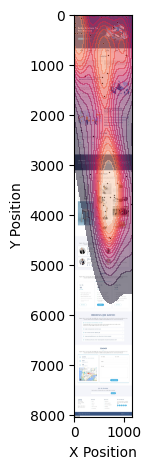

In [68]:
img = cv2.imread('site.jpeg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

df_filtrado = df[df["Y Position"] < img.shape[0]]

df_filtrado["X Position"] = df_filtrado["X Position"] * 0.93

sns.scatterplot(
    df_filtrado,
    x="X Position",
    y="Y Position",
    s=1, c="k"
)

sns.kdeplot(
    df_filtrado,
    x="X Position",
    y="Y Position",
    fill=True, cmap="rocket", alpha=0.5, levels=15
)

plt.xlim(0, img.shape[1])
plt.ylim(img.shape[0], 0)



plt.tight_layout()
plt.savefig("heatmap.png", dpi=1900)

In [13]:
img.shape

(8025, 1154, 3)

In [15]:
df_filtrado = df[df["Y Position"] < img.shape[0]]
df_filtrado

,Timestamp,X Position,Y Position
0,2024-03-22T11:34:48.205Z,508,547
1,2024-03-22T11:34:48.949Z,620,547
2,2024-03-22T11:34:49.819Z,822,225
3,2024-03-22T11:34:50.819Z,570,40
4,2024-03-22T11:34:52.116Z,718,783
5,2024-03-22T11:34:52.533Z,710,3356
6,2024-03-22T11:34:53.659Z,917,3359
7,2024-03-22T11:34:53.980Z,909,122
8,2024-03-22T11:34:56.164Z,1101,28
9,2024-03-22T11:34:56.371Z,1103,781
